<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li></ul></div>

# Description

Aim: just vizualize the results of the code. 

# Load

In [119]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
path='Data/10Nodes/'

In [135]:
with open(os.path.join(path, 'output.pkl'), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance = pickle.load(f)

In [136]:
OD

{('0', '0_p'): 20, ('5', '5_p'): 30}

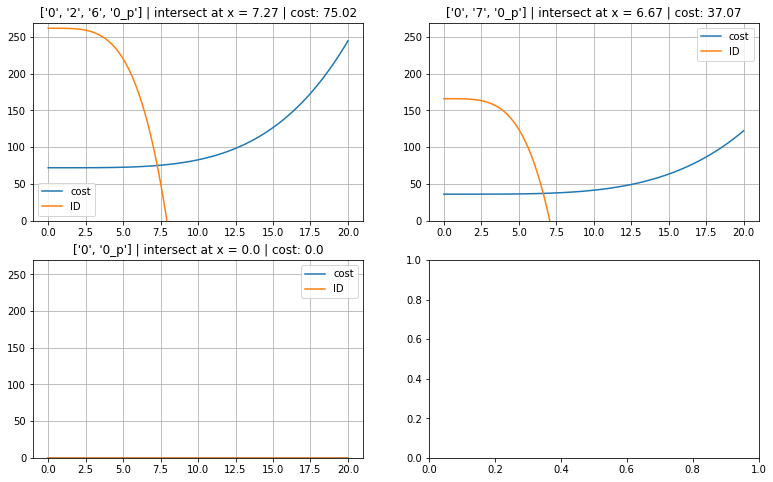

In [152]:
from result_analysis import plot_cost_all_path
plot_cost_all_path(G_FW[0], OD, '0', '0_p')

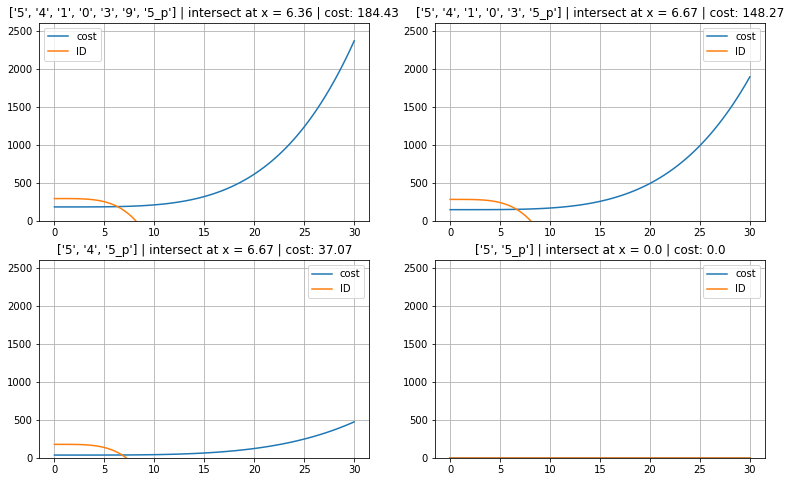

In [153]:
plot_cost_all_path(G_FW[0], OD, '5', '5_p')

In [139]:
for e in G_FW[-1].edges():
    print(e[0],e[1], np.around(G_FW[-1][e[0]][e[1]]['f_m'],2), np.around(G_FW[-1][e[0]][e[1]]['f_r'],2))

0 1 0.0 6.85
0 2 7.28 0.0
0 3 10.74 0.0
0 7 6.63 0.0
0 R 0.0 17.8
0 0_p 6.09 0.0
1 0 10.74 0.0
1 4 0.0 6.85
2 0 0.0 7.28
2 6 7.28 0.0
3 0 0.0 10.75
3 9 5.06 0.0
3 5_p 5.67 0.0
4 1 10.74 0.0
4 5 0.0 13.03
4 8 0.0 0.0
4 5_p 6.18 0.0
5 4 16.92 0.0
5 R 0.0 13.03
5 5_p 13.08 0.0
6 2 0.0 7.28
6 0_p 7.28 0.0
7 0 0.0 6.63
7 0_p 6.63 0.0
8 4 0.0 0.0
9 3 0.0 5.06
9 5_p 5.06 0.0


In [140]:
from result_analysis import plot_ri

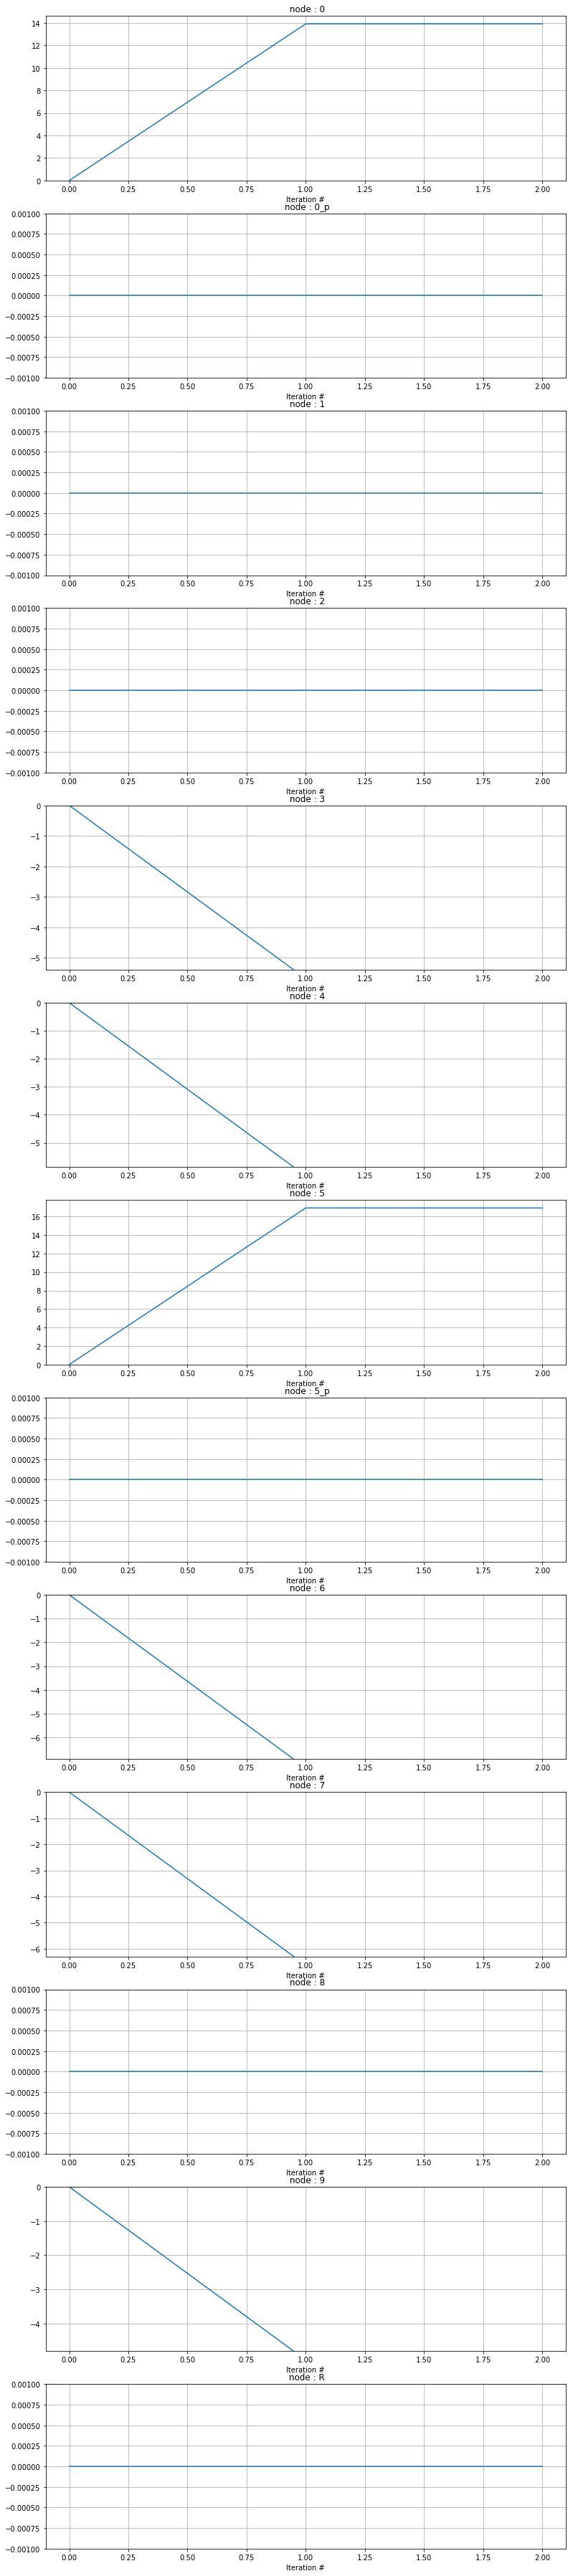

In [141]:
plot_ri(ri_FW)

<Figure size 432x288 with 0 Axes>

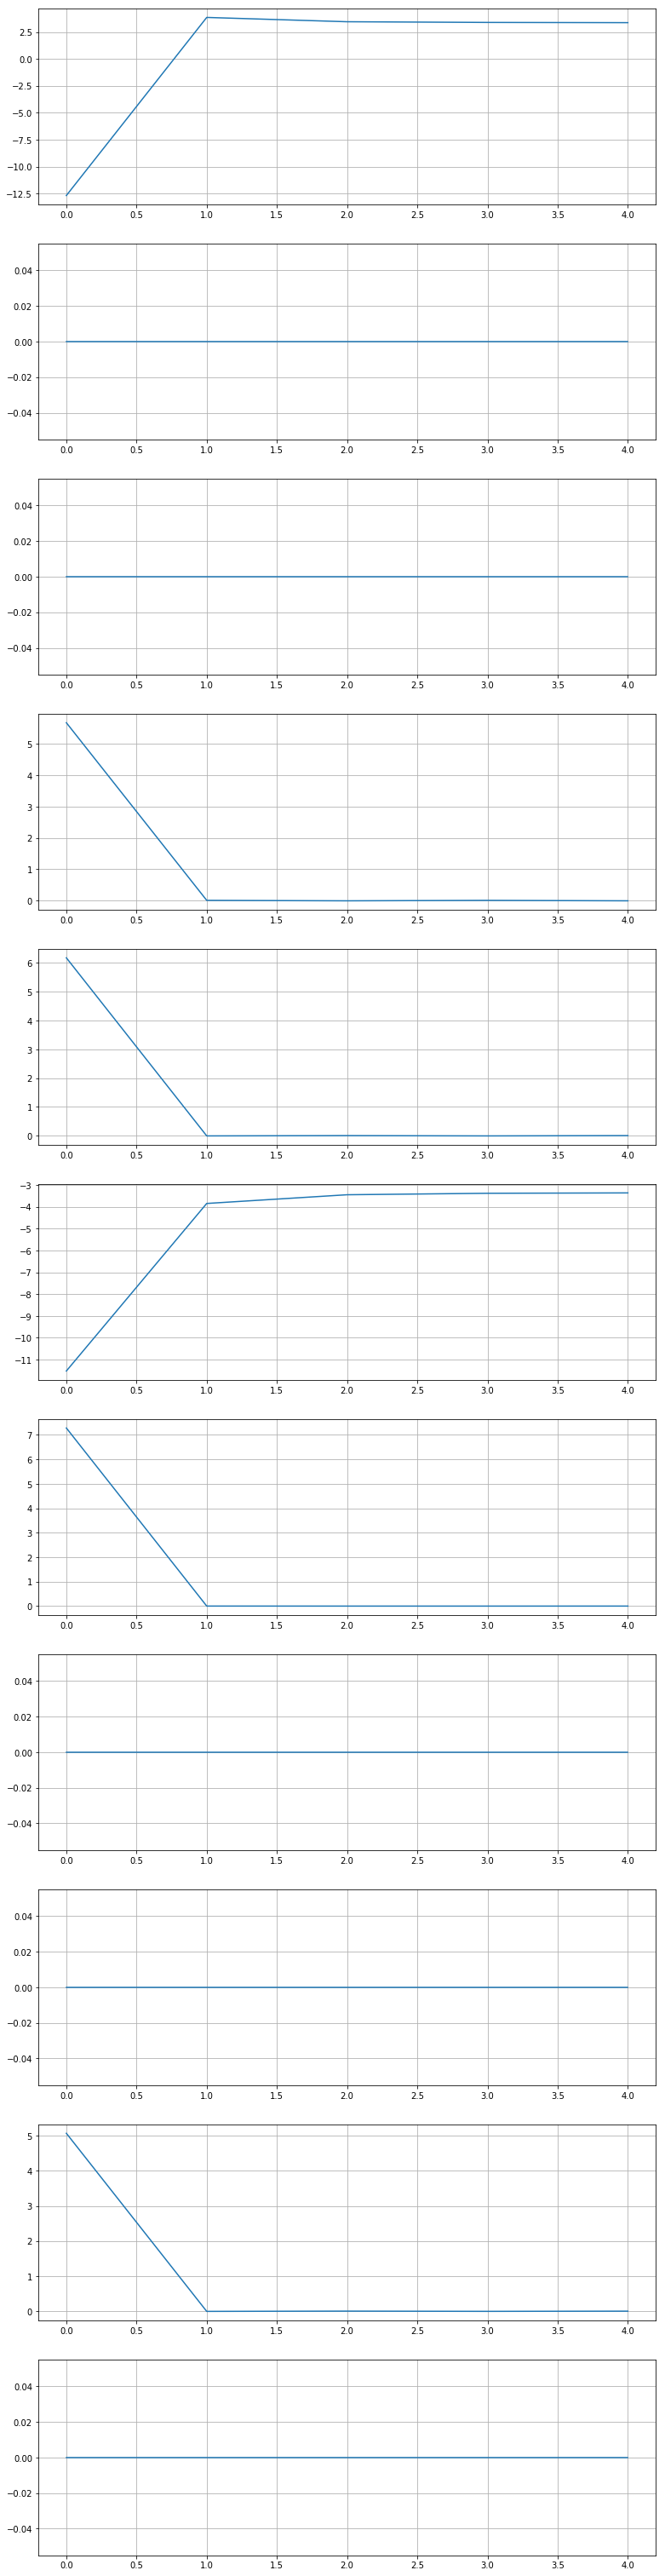

In [83]:
plt.figure()
_, axes = plt.subplots(balance.shape[1],1,figsize=(13,5*balance.shape[1]))
for n in range(balance.shape[1]):
    axes[n].plot(balance[:,n])
    axes[n].grid(True)
#     axes[n].set_ylim([np.min(balance[-5:,n])*.9, np.max(balance[-5:,n])*1.1])

In [142]:
np.linalg.norm(balance[-1,:])

5.5004758885142895

In [143]:
balance.shape

(2, 11)

In [144]:
balance_norm=np.linalg.norm(balance,axis=1)

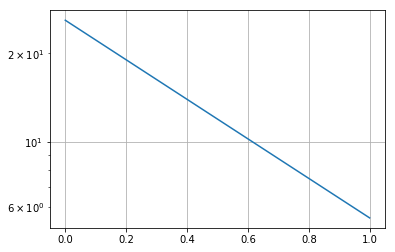

In [145]:
plt.plot(balance_norm)
plt.grid(True)
plt.yscale('log')

In [129]:
balance_norm[-1]

4.76455217001039

In [89]:
from result_analysis import print_final_flows

In [90]:
print_final_flows(G_FW)

('0', '1')  :  7.380081955794935
('0', '2')  :  7.280963639339299
('0', '3')  :  10.742318549484805
('0', '7')  :  0.0
('0', 'R')  :  15.490584470172763
('0', '0_p')  :  7.875040745549427
('1', '0')  :  10.742322002889132
('1', '4')  :  7.380081955794935
('2', '0')  :  7.280194500883918
('2', '6')  :  7.280963639339299
('3', '0')  :  10.746472856568227
('3', '9')  :  5.067144108163565
('3', '5_p')  :  5.675174441321251
('4', '1')  :  10.742322002889132
('4', '5')  :  13.550572512345166
('4', '8')  :  0.0
('4', '5_p')  :  6.1755789585785354
('5', '4')  :  16.917897508063326
('5', 'R')  :  8.706576897233887
('5', '0_p')  :  4.843995615111278
('5', '5_p')  :  13.082102491936627
('6', '2')  :  7.280194500883918
('6', '0_p')  :  7.280963639339299
('7', '0')  :  0.0
('8', '4')  :  0.0
('9', '3')  :  5.0643641763450695
('9', '5_p')  :  5.067144108163565


Some way of measuring the amplitudes of oscillations? 

In [156]:
nx.write_graphml(G_FW[-1],os.path.join(path,'graph.graphml'))